Linear Regression Coefficients:
Electricity Tariff Coefficient: -0.9268910066315904
Carbon Intensity Coefficient: 0.12258623189823195
Intercept: 47.10856444021268
R-squared: 0.37240547558405923


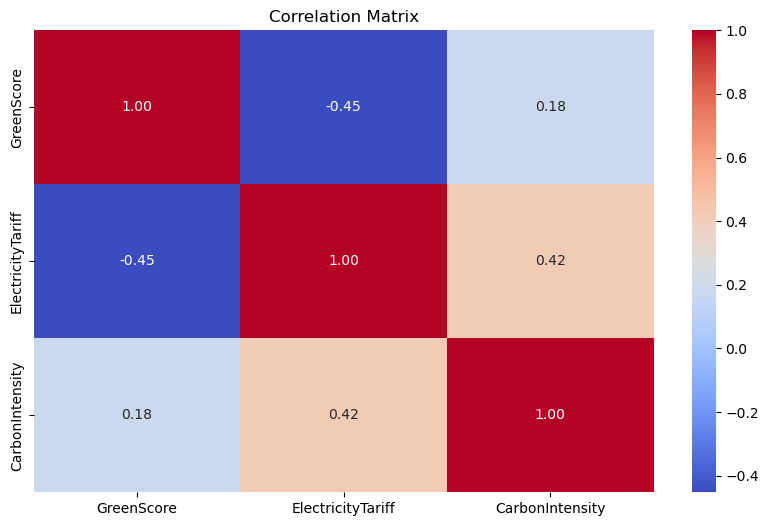

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Load all JSON files into a single DataFrame
file_paths = glob.glob("C:/Users/brand/OneDrive/Desktop/IC/IOT/Final_Project/data/*.json")
data_frames = []

for file in file_paths:
    df = pd.read_json(file)
    data_frames.append(df)

# Combine all data into one DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Select relevant columns
combined_df = combined_df[["valid_from", "region_y", "normalized_green_score", "value_inc_vat", "forecast"]]
combined_df.rename(columns={
    "valid_from": "Time",
    "region": "Region",
    "normalized_green_score": "GreenScore",
    "value_inc_vat": "ElectricityTariff",
    "forecast": "CarbonIntensity"
}, inplace=True)

# Convert 'Time' to datetime
combined_df["Time"] = pd.to_datetime(combined_df["Time"])

# Drop rows with missing values
combined_df.dropna(inplace=True)

# Fit a linear regression model
X = combined_df[["ElectricityTariff", "CarbonIntensity"]]
y = combined_df["GreenScore"]

model = LinearRegression()
model.fit(X, y)

# Predictions and R-squared
predictions = model.predict(X)
r2 = r2_score(y, predictions)

# Print coefficients
print("Linear Regression Coefficients:")
print(f"Electricity Tariff Coefficient: {model.coef_[0]}")
print(f"Carbon Intensity Coefficient: {model.coef_[1]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {r2}")

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = combined_df[["GreenScore", "ElectricityTariff", "CarbonIntensity"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

